Загружаем датасет

In [32]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_path = kagglehub.dataset_download("sameelie/resume-hh")
df = pd.read_csv(f'{dataset_path}/hh_ru.csv', sep=';')
df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

In [34]:
df.isnull().sum()

,0
"Пол, возраст",0
ЗП,0
Ищет работу на должность:,0
"Город, переезд, командировки",0
Занятость,0
График,0
Опыт работы,168
Последнее/нынешнее место работы,1
Последняя/нынешняя должность,2
Образование и ВУЗ,0


In [35]:
df.dropna(inplace=True)

# Предобработка данных

In [36]:
import re
import math
from pandas.api.types import is_numeric_dtype

Делим колонку 'Пол, возраст' на две и переводим в числовые колонки
* М - 1
* Ж - 0

In [37]:
if df.columns.__contains__('Пол, возраст'):
    sex_age_col = df['Пол, возраст'].values
    sex_col = []
    age_col = []
    for row in sex_age_col:
        sex = row.split(',')[0].strip()
        sex_col.append(int(sex.startswith('М')))
        age = re.findall('\d+', row.split(',')[1])[0]
        age_col.append(int(age))
    df['Пол'] = sex_col
    df['Возраст'] = age_col
    df = df.drop(columns=['Пол, возраст'])

Превращаем колонку 'ЗП' в числовую

In [38]:
if not is_numeric_dtype(df['ЗП']):
    salary_col = df['ЗП'].values
    df['ЗП'] = [int(re.findall('\d+', val)[0]) for val in salary_col]

Превращаем колонку 'Авто' в числовую
* Есть авто - 1
* Нет авто/нет данных - 0

In [39]:
if not is_numeric_dtype(df['Авто']):
    is_car_exists_col = df['Авто'].values
    df['Авто'] = [int(val.strip().startswith('Имеется')) for val in is_car_exists_col]

Разбиваем колонку 'Город, переезд, командировки' на три

In [40]:
if df.columns.__contains__('Город, переезд, командировки'):
    city_moving_trips_col = df['Город, переезд, командировки'].values
    city_col = []
    moving_col = []
    trip_col = []

    for row in city_moving_trips_col:
        city_col.append(row.split(',')[0].strip())
        moving_col.append(int(re.search(r'не готов(?:а)? к переезду', row) is None))
        trip_col.append(int(re.search(r'не готов(?:а)? к командировкам', row) is None))
    df['Город'] = city_col
    df['Переезд'] = moving_col
    df['Командировки'] = trip_col
    df = df.drop(columns=['Город, переезд, командировки'])

Разбиваем колонку 'Занятость' на несколько: 'волонтерство', 'полная занятость', 'проектная работа', 'стажировка', 'частичная занятость'

In [41]:
if df.columns.__contains__('Занятость'):
    work_type_col = df['Занятость'].values
    new_cols = {
        'Волонтерство': [],
        'Полная занятость': [],
        'Проектная работа': [],
        'Стажировка': [],
        'Частичная занятость': []
    }

    for row in work_type_col:
        for col in new_cols.keys():
            is_col_exists = row.find(col.lower()) >= 0
            new_cols[col].append(int(is_col_exists))
    for col in new_cols:
        df[col] = new_cols[col]
    df = df.drop(columns=['Занятость'])

Превращаем колонку 'Опыт работы' в числовую

In [42]:
if not is_numeric_dtype(df['Опыт работы']):
    work_experience_col = df['Опыт работы'].values
    work_experience_month_col = []

    # regex patterns
    year_pattern = r'Опыт работы (\d+) (?:год(?:а)?|лет).*'
    month_pattern = r'Опыт работы(?: \d+ (?:год(?:а)?|лет))? (\d+) месяц(?:а|ев)?.*'

    for row in work_experience_col:
        exp = 0
        if not(type(row).__name__ == 'float' and math.isnan(row)):
            matcher = re.compile(year_pattern, flags=re.IGNORECASE)
            match_val = matcher.match(row)
            if match_val: # год
                exp += (int(match_val.group(1)) * 12)

            matcher = re.compile(month_pattern, flags=re.IGNORECASE)
            match_val = matcher.match(row)
            if match_val: # месяц
                exp += int(match_val.group(1))
        if exp == 0:
            work_experience_month_col.append(0)
        elif exp >= 12 and exp <= 36:
            work_experience_month_col.append(1)
        elif exp > 36 and 72:
            work_experience_month_col.append(2)
        else:
            work_experience_month_col.append(3)
    df['Опыт работы'] = work_experience_month_col

Превращаем колонку 'График' в числовую

In [43]:
if df.columns.__contains__('График'):
    work_schedule_col = df['График'].values
    work_schedule_type_col = {
        'Вахтовый метод': [],
        'Гибкий график': [],
        'Полный день': [],
        'Сменный график': [],
        'Удаленная работа': []
    }

    for row in work_schedule_col:
        for col in work_schedule_type_col.keys():
            is_col_exists = row.find(col.lower()) >= 0
            work_schedule_type_col[col].append(int(is_col_exists))
    for col in work_schedule_type_col.keys():
        df[col] = work_schedule_type_col[col]
    df = df.drop(columns=['График'])

Убираем странные резюме

In [44]:
drop_idx = []
min_work_age = 14 # по ТК РФ
for idx, row in df.iterrows():
    if row['Возраст'] < min_work_age:
        drop_idx.append(idx)
    elif row['Возраст'] == min_work_age and row['Опыт работы'] > 11:
        drop_idx.append(idx)
    elif ((row['Возраст'] - min_work_age) * 12 + 11) < row['Опыт работы']:
        drop_idx.append(idx)
    elif row['Возраст'] > 64:
        drop_idx.append(idx)
df = df.drop(drop_idx)

Превращаем колонку "Образование и ВУЗ" в числовую
* Среднее образование - 0
* Неоконченное высшее - 1
* Среднее специальное - 2
* Высшее образование - 3

In [45]:
import pandas as pd
import operator

keys = [
    'Среднее образование',
    'Среднее специальное',
    'Неоконченное высшее',
    'Высшее образование'
]
if not is_numeric_dtype(df['Образование и ВУЗ']):
  df['Образование и ВУЗ'] = df['Образование и ВУЗ'].astype(str).apply(lambda x: ' '.join(x.split()[:2]))
  df['Образование и ВУЗ'] = [operator.indexOf(keys, item) for item in df['Образование и ВУЗ'].values]

Расширяем категории

In [46]:
categories = {
    "IT и Разработка программного обеспечения": [
        "разработчик", "программист", "devops", "администратор", "системный", "сетевой", "data", "аналитик",
        "qa", "тестировщик", "frontend", "backend", "full stack", "web", "software", "it", "инженер ит",
        "python", "java", "c#", "javascript", "ruby", "php", "sql", "oracle", "sap", "unity", "android", "ios",  "C/C++",
        "блокчейн", "машинное обучение", "ai", "архитектор", "dev", "engineer", "технический специалист"
    ],
    "Управление и Руководство": [
        "руководитель", "начальник", "менеджер", "управляющий", "директор",
        "заместитель", "супервайзер", "бригадир", "прораб", "мастер",
        "координатор", "руководство", "head of", "team lead", "лидер",
        "управление", "заведующий", "главный", "ведущий", "зам.", "ROP"
    ],
    "Дизайн и UX/UI": [
        "дизайнер", "ux", "ui", "графический", "веб-дизайнер", "3d", "моушн", "иллюстратор", "художник",
        "визуализатор", "арт", "верстальщик", "web design", "графика"
    ],
    "Творчество и Медиа": [
        "дизайнер", "креативный", "продюсер", "редактор", "сценарист",
        "художник", "видеомонтажер", "VFX", "motion", "геймдизайнер",
        "звукорежиссер", "иллюстратор", "копирайтер", "арт", "аниматор"
    ],
    "Маркетинг и Продажи": [
        "маркетолог", "seo", "smm", "таргетолог", "копирайтер", "контент", "продажи", "менеджер по продажам",
        "e-commerce", "digital", "реклама", "аналитик маркетинга", "product marketing", "brand",
        "продажи", "менеджер по продажам", "торговый представитель",
        "региональный представитель", "кассир", "консультант",
        "мерчендайзер", "супервайзер", "аккаунт-менеджер", "KAM",
        "клиентский менеджер", "сейлз", "розничная торговля", "ритейл"
    ],
    "Технические специальности": [
        "инженер", "техник", "монтажник", "электрик", "связи", "кипиа",
        "волс", "скс", "слаботочные системы", "ремонт", "обслуживание",
        "электроник", "радио", "телекоммуникации", "сварщик", "опс",
        "наладчик", "механик", "электромеханик", "конструктор", "проектировщик"
    ],
    "Образование и Наука": [
        "учитель", "преподаватель", "методист", "научный сотрудник", "образование", "обучение", "тренер",
        "лектор", "исследователь", "ассистент", "студент", "стажер"
    ],
    "Финансы и Экономика": [
        "бухгалтер", "экономист", "финансист", "аналитик", "аудит", "кассир", "операционист", "финансовый",
        "бюджет", "учет", "контролер"
    ],
    "Администрирование и Поддержка": [
        "администратор", "помощник", "секретарь", "офис-менеджер", "ресепшн", "координатор", "ассистент",
        "менеджер офиса", "дежурный", "оператор", "диспетчер", "поддержка", "helpdesk", "сервис"
    ],
    "Другие": [
        "водитель", "грузчик", "курьер", "охранник", "кладовщик", "уборщик", "сборщик", "оператор",
        "логист", "специалист", "работник", "сотрудник", "стажер", "ученик"
    ]
}

In [47]:
def categorize_profession(profession):
    profession_lower = profession.lower()
    for category, keywords in categories.items():
        if any(keyword in profession_lower for keyword in keywords):
            return category
    return "Прочее"


if df.columns.__contains__('Ищет работу на должность:'):
  df['Отрасль'] = df['Ищет работу на должность:'].apply(categorize_profession)
  df = pd.get_dummies(df, columns=['Отрасль'], prefix='Отрасль')
  df = df.drop(columns=['Ищет работу на должность:'])

Результат

In [48]:
df.head()

,ЗП,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто,Пол,Возраст,Город,...,Отрасль_Администрирование и Поддержка,Отрасль_Дизайн и UX/UI,Отрасль_Другие,Отрасль_Маркетинг и Продажи,Отрасль_Образование и Наука,Отрасль_Прочее,Отрасль_Творчество и Медиа,Отрасль_Технические специальности,Отрасль_Управление и Руководство,Отрасль_Финансы и Экономика
0,29000,2,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2,16.04.2019 15:59,1,1,39,Советск (Калининградская область),...,False,False,False,False,False,False,False,False,False,False
1,40000,2,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",3,12.04.2019 08:42,0,1,60,Королев,...,False,False,False,False,False,True,False,False,False,False
2,20000,2,ПАО Сбербанк,Кассир-операционист,1,16.04.2019 08:35,0,0,36,Тверь,...,True,False,False,False,False,False,False,False,False,False
3,100000,2,OpenSoft,Инженер-программист,3,08.04.2019 14:23,0,1,38,Саратов,...,False,False,False,False,False,False,False,False,False,False
4,140000,2,Мармелад,Менеджер по продажам,3,22.04.2019 10:32,0,0,26,Москва,...,False,False,False,False,False,False,False,False,True,False


In [49]:
import pandas as pd
for col in df.columns:
    if not pd.api.types.is_numeric_dtype(df[col]):
      print(f'Удаляем: {col}')
      df = df.drop(columns=[col])

Удаляем: Последнее/нынешнее место работы
Удаляем: Последняя/нынешняя должность
Удаляем: Обновление резюме
Удаляем: Город


# Зависимости между признаками

In [50]:
import seaborn as sns

df.corr(numeric_only=True)

,ЗП,Опыт работы,Образование и ВУЗ,Авто,Пол,Возраст,Переезд,Командировки,Волонтерство,Полная занятость,...,Отрасль_Администрирование и Поддержка,Отрасль_Дизайн и UX/UI,Отрасль_Другие,Отрасль_Маркетинг и Продажи,Отрасль_Образование и Наука,Отрасль_Прочее,Отрасль_Творчество и Медиа,Отрасль_Технические специальности,Отрасль_Управление и Руководство,Отрасль_Финансы и Экономика
ЗП,1.000000,0.040040,0.118475,0.016377,0.063638,0.095929,0.066217,0.107096,0.003265,0.051484,...,-0.053370,-0.022233,-0.071585,-0.026920,-0.011547,0.014339,-0.018628,-0.072791,0.101758,-0.009846
Опыт работы,0.040040,1.000000,0.062365,0.052220,0.028469,0.197407,0.006563,0.039990,-0.013308,-0.004304,...,-0.010862,-0.021630,-0.034038,-0.010726,0.011396,-0.011782,-0.002474,-0.002100,0.053783,-0.001106
Образование и ВУЗ,0.118475,0.062365,1.000000,0.077460,-0.052751,0.177318,0.079040,0.175972,-0.011700,0.008461,...,-0.123720,-0.012616,-0.048106,-0.009298,0.002419,0.002897,0.007838,-0.081999,0.119560,0.005449
Авто,0.016377,0.052220,0.077460,1.000000,0.136335,0.087378,0.029604,0.073619,-0.005782,0.017778,...,-0.033677,-0.036072,-0.024264,-0.016483,-0.003178,-0.023642,-0.021837,0.032530,0.057572,-0.004443
Пол,0.063638,0.028469,-0.052751,0.136335,1.000000,0.083977,0.091612,0.092778,0.020505,0.039960,...,-0.126006,-0.028570,-0.053050,-0.037677,-0.027354,-0.042304,-0.051567,0.097119,-0.106416,-0.032355
Возраст,0.095929,0.197407,0.177318,0.087378,0.083977,1.000000,-0.028999,0.086662,-0.017809,0.024820,...,-0.019328,-0.050992,-0.069015,-0.027342,-0.017141,-0.027770,-0.006515,0.028553,0.121049,-0.004397
Переезд,0.066217,0.006563,0.079040,0.029604,0.091612,-0.028999,1.000000,0.304261,0.054942,0.065503,...,-0.059409,0.022213,-0.039351,-0.019543,-0.003288,0.021251,-0.003043,-0.021890,0.032317,0.000817
Командировки,0.107096,0.039990,0.175972,0.073619,0.092778,0.086662,0.304261,1.000000,0.022840,0.100749,...,-0.111290,-0.005678,-0.060159,-0.029874,-0.016613,0.005608,-0.015946,-0.035236,0.100105,-0.014766
Волонтерство,0.003265,-0.013308,-0.011700,-0.005782,0.020505,-0.017809,0.054942,0.022840,1.000000,-0.020188,...,-0.006620,0.021148,-0.002222,0.009106,-0.004036,0.007775,-0.006428,-0.005207,-0.034048,-0.003651
Полная занятость,0.051484,-0.004304,0.008461,0.017778,0.039960,0.024820,0.065503,0.100749,-0.020188,1.000000,...,-0.021880,-0.013162,0.002886,-0.044878,-0.012809,-0.017808,-0.020019,0.036975,0.057336,-0.000951


<Axes: >

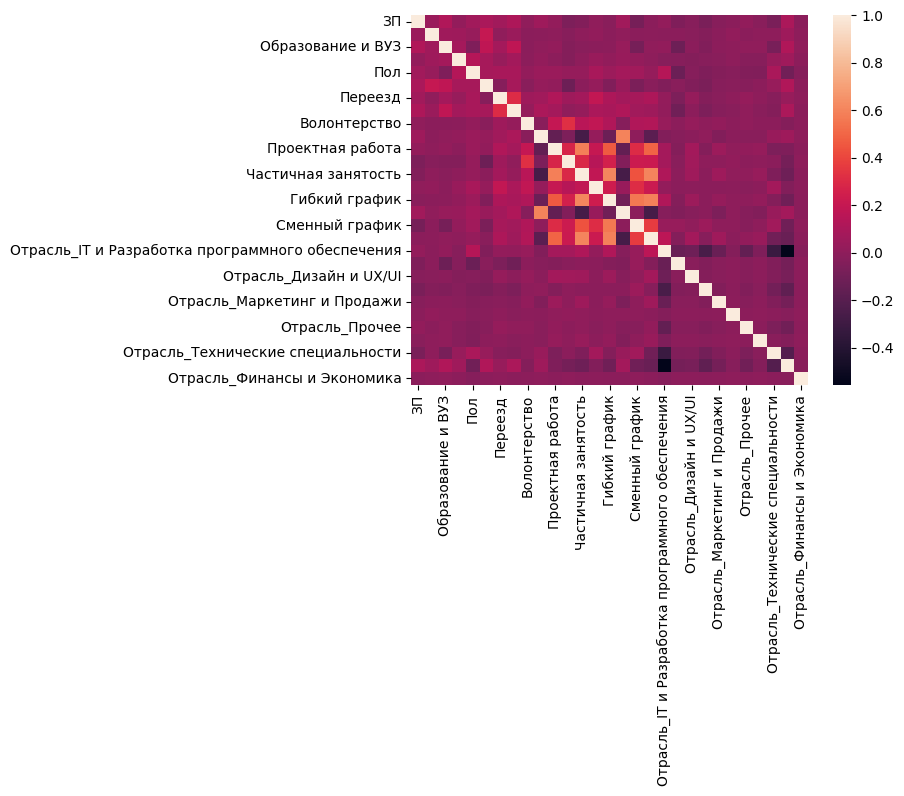

In [51]:
sns.heatmap(df.corr(numeric_only=True))

Смотрим корреляцию с целевой переменной

In [52]:
correlation_with_salary = df.corr(numeric_only=True)['ЗП'].drop('ЗП')
top_correlations = correlation_with_salary.abs().sort_values(ascending=False).head(5)
top_correlations

,ЗП
Образование и ВУЗ,0.118475
Командировки,0.107096
Отрасль_Управление и Руководство,0.101758
Возраст,0.095929
Сменный график,0.084604


# Графики

Смотрим влияние отрасли на ЗП

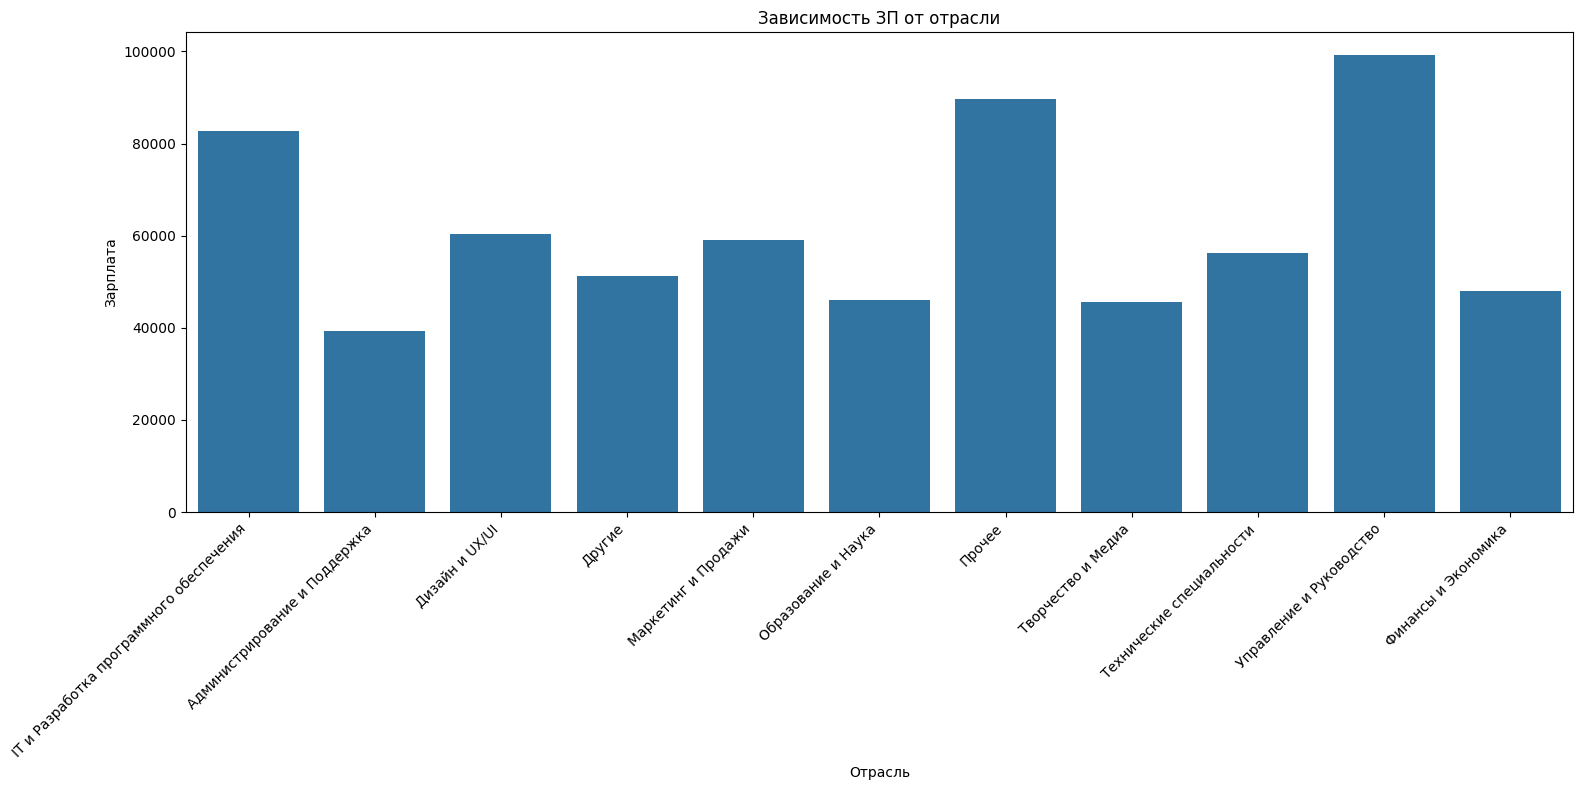

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

industry_salary = df.groupby(df.columns[df.columns.str.startswith('Отрасль_')].tolist())['ЗП'].mean().reset_index()
industry_salary_melted = pd.melt(industry_salary, id_vars=['ЗП'], var_name='Отрасль', value_name='Value')
industry_salary_melted = industry_salary_melted[industry_salary_melted['Value'] == 1]
industry_salary_melted['Отрасль'] = industry_salary_melted['Отрасль'].str.replace('Отрасль_', '')

plt.figure(figsize=(16, 8))
sns.barplot(x='Отрасль', y='ЗП', data=industry_salary_melted)
plt.xticks(rotation=45, ha='right')
plt.title('Зависимость ЗП от отрасли')
plt.xlabel('Отрасль')
plt.ylabel('Зарплата')
plt.tight_layout()
plt.show()

Смотрим влияние образования на ЗП

<ipython-input-54-2bb73f3704d0>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Образование и ВУЗ', y='ЗП', data=df, ci=None)


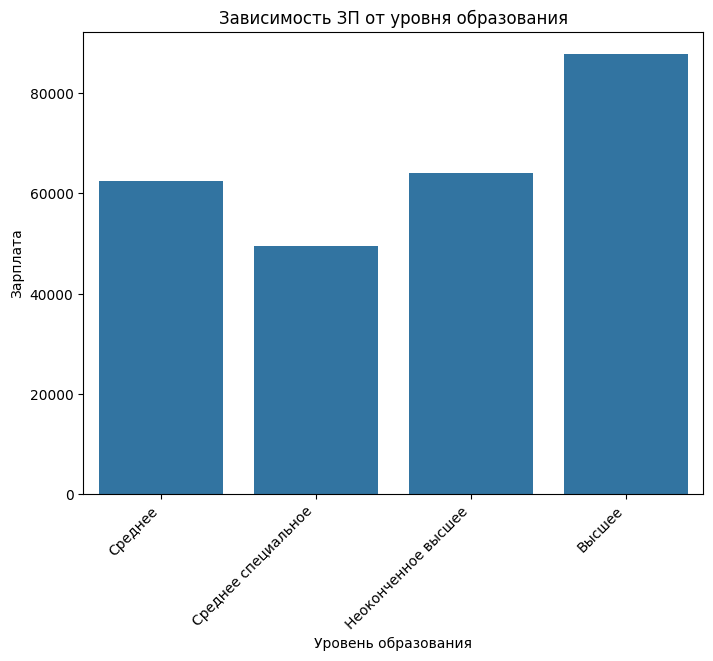

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(x='Образование и ВУЗ', y='ЗП', data=df, ci=None)
plt.xticks(ticks=range(4), labels=['Среднее', 'Среднее специальное', 'Неоконченное высшее', 'Высшее'], rotation=45, ha='right')
plt.title('Зависимость ЗП от уровня образования')
plt.xlabel('Уровень образования')
plt.ylabel('Зарплата')
plt.show()

# Сравнение методов

## Предобработка данных

In [55]:
from sklearn.model_selection import train_test_split

X = df.drop('ЗП', axis=1)
y = df['ЗП']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Линейная регрессия (ElasticNet)

In [57]:
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet()
param_grid = {'alpha': [0.1, 1, 5, 10, 50, 100], 'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [58]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

grid_model = GridSearchCV(estimator=elastic_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.5s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.6s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   1.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   1.4s
[CV] END ............................alpha=0.1,

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.595e+13, tolerance: 3.723e+10
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.673e+13, tolerance: 3.729e+10
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.003e+14, tolerance: 4.159e+10
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.436e+13, tolerance: 3.428e+10
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   5.2s


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.254e+13, tolerance: 3.174e+10
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   1.2s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [59]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.9}

In [60]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Предсказания на тестовом наборе
y_pred = grid_model.predict(X_test)

# MAE
en_mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {en_mae}")

# RMSE
en_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {en_rmse}")

Mean Absolute Error (MAE): 45969.96012602098
Root Mean Squared Error (RMSE): 162863.08737083263


## Дерево решений (decision tree)

Лучшие параметры: {'max_depth': 5, 'max_leaf_nodes': 50, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Absolute Error (MAE): 45739.86672116639
Root Mean Squared Error (RMSE): 163439.24875929786


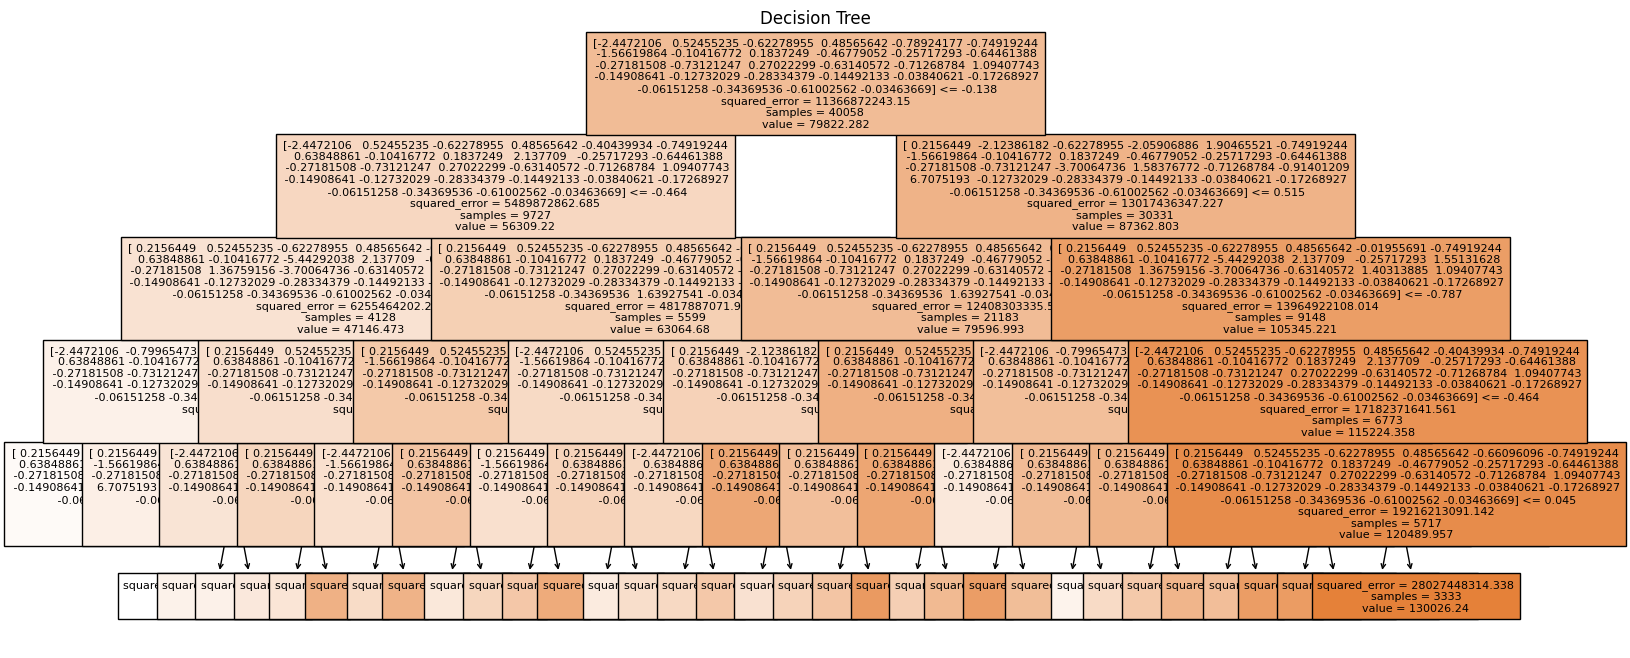

In [62]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import numpy as np

# Улучшение модели с использованием поиска по сетке для оптимизации гиперпараметров

# Определение параметров для поиска
# param_grid = {
#     'max_depth': [3, 5, 10, 20, None],
#     'max_leaf_nodes': [10, 20, 50, 100, 200, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

param_grid = {'max_depth': [5], 'max_leaf_nodes': [50], 'min_samples_leaf': [1], 'min_samples_split': [2]}

# Инициализация модели DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=101)

# Поиск по сетке
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

dt_model = DecisionTreeRegressor(random_state=101, **best_params)
dt_model.fit(X_train, y_train)

# 2. Оценка метрик работы модели
y_pred = dt_model.predict(X_test)

# MAE
dt_mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {dt_mae}")

# RMSE
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {dt_rmse}")

# Построение дерева решений
plt.figure(figsize=(16, 8))
plot_tree(dt_model, feature_names=X_train, filled=True, fontsize=8)
plt.title("Decision Tree")
plt.show()

## Случайный лес

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Лучшие параметры для случайного леса: {'bootstrap': True, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Mean Absolute Error (MAE): 43837.410390722434
Root Mean Squared Error (RMSE): 161559.9212007471


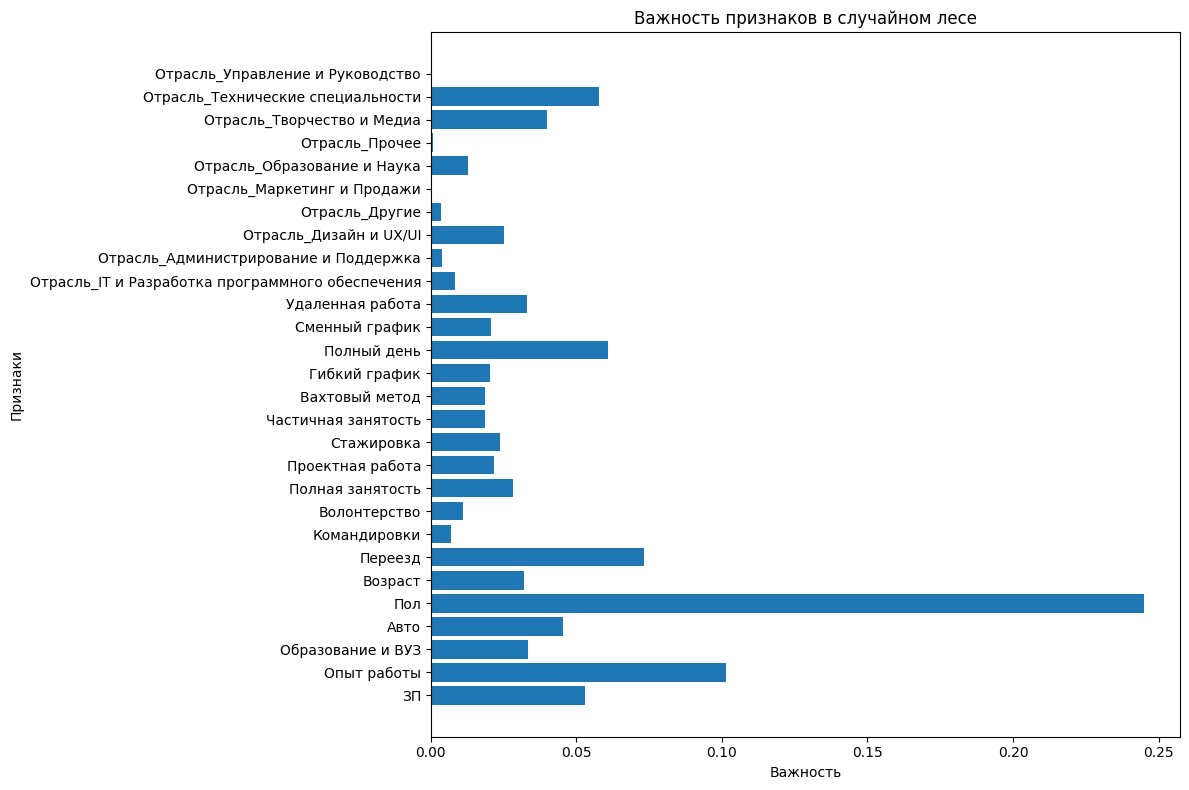

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Определение параметров для поиска
# param_grid_rf = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [5, 10, 20, None],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True]
# }

param_grid_rf = {'bootstrap': [True], 'max_depth': [20], 'max_features': ['log2'], 'min_samples_leaf': [4], 'min_samples_split': [10], 'n_estimators': [200]}

# Инициализация модели RandomForestRegressor
rf = RandomForestRegressor(random_state=101)

# Поиск по сетке
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
print("Лучшие параметры для случайного леса:", best_params_rf)

# Обучение модели с лучшими параметрами
rf_model = RandomForestRegressor(random_state=101, **best_params_rf)
rf_model.fit(X_train, y_train)

# Оценка метрик работы модели
y_pred_rf = rf_model.predict(X_test)

# MAE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Mean Absolute Error (MAE): {mae_rf}")

# RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")

# Важность признаков
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(12, 8))
plt.barh(df.columns[:-1], feature_importances)
plt.title("Важность признаков в случайном лесе")
plt.xlabel("Важность")
plt.ylabel("Признаки")
plt.tight_layout()
plt.show()

**Сравнение различных степеней полинома**

In [64]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Создаем список степеней полиномов для тестирования
degrees = [1, 2, 3]

# Подготовка данных (используем уже масштабированные данные)
X_train_poly = X_train
X_test_poly = X_test

# Словарь для хранения результатов
results = {'degree': [], 'train_score': [], 'test_score': []}

# Перебираем степени полинома
for degree in degrees:
    # Создаем pipeline с PolynomialFeatures и моделью
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('model', LinearRegression())
    ])

    # Обучаем модель
    pipeline.fit(X_train_poly, y_train)

    # Оценка на тренировочных данных
    train_score = pipeline.score(X_train_poly, y_train)

    # Оценка на тестовых данных
    test_score = pipeline.score(X_test_poly, y_test)

    # Сохраняем результаты
    results['degree'].append(degree)
    results['train_score'].append(train_score)
    results['test_score'].append(test_score)

    print(f"Degree {degree}: Train R2 = {train_score:.4f}, Test R2 = {test_score:.4f}")

# # Визуализация результатов
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.plot(results['degree'], results['train_score'], 'o-', label='Train R2')
# plt.plot(results['degree'], results['test_score'], 'o-', label='Test R2')
# plt.xlabel('Polynomial Degree')
# plt.ylabel('R2 Score')
# plt.title('Model Performance vs Polynomial Degree')
# plt.legend()
# plt.grid(True)
# plt.show()

# Выбираем лучшую степень на основе тестового R2
best_degree = results['degree'][np.argmax(results['test_score'])]
print(f"\nBest polynomial degree based on test R2: {best_degree}")

# Создаем финальный pipeline с лучшей степенью
final_poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=best_degree)),
    ('scaler', StandardScaler()),
    ('model', ElasticNet(**grid_model.best_params_))
])

# Обучаем финальную модель
final_poly_pipeline.fit(X_train, y_train)

# Оценка финальной модели
final_train_score = final_poly_pipeline.score(X_train, y_train)
final_test_score = final_poly_pipeline.score(X_test, y_test)

print(f"\nFinal Model with Polynomial Features (degree={best_degree}):")
print(f"Train R2: {final_train_score:.4f}")
print(f"Test R2: {final_test_score:.4f}")

# Предсказания на тестовом наборе
y_pred_poly = final_poly_pipeline.predict(X_test)

# MAE и RMSE для финальной модели
mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print(f"\nMean Absolute Error (MAE) with polynomial features: {mae_poly}")
print(f"Root Mean Squared Error (RMSE) with polynomial features: {rmse_poly}")

Degree 1: Train R2 = 0.0638, Test R2 = 0.0289
Degree 2: Train R2 = 0.0813, Test R2 = 0.0335
Degree 3: Train R2 = 0.1044, Test R2 = -0.3412

Best polynomial degree based on test R2: 2


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.749e+14, tolerance: 4.553e+10
  model = cd_fast.enet_coordinate_descent(



Final Model with Polynomial Features (degree=2):
Train R2: 0.0813
Test R2: 0.0335

Mean Absolute Error (MAE) with polynomial features: 44749.72390179775
Root Mean Squared Error (RMSE) with polynomial features: 162470.78210913765


**Регрессия KNN**

In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Создаем KNN регрессор
knn = KNeighborsRegressor()

# Параметры для GridSearchCV
param_grid = {
    'n_neighbors': range(3, 21, 2),  # Проверяем нечетные значения от 3 до 19
    'weights': ['uniform', 'distance'],  # Типы весов
    'p': [1, 2]  # 1 - манхэттенское расстояние, 2 - евклидово
}

# Создаем GridSearchCV объект
grid_knn = GridSearchCV(estimator=knn,
                       param_grid=param_grid,
                       cv=5,
                       scoring='neg_mean_squared_error',
                       verbose=1,
                       n_jobs=-1)

# Обучаем модель
print("Начинаем подбор параметров для KNN...")
grid_knn.fit(X_train, y_train)

# Лучшие параметры
print("\nЛучшие параметры для KNN:")
print(grid_knn.best_params_)

# Предсказания на тестовом наборе
y_pred_knn = grid_knn.predict(X_test)

# Оценка модели
print("\nОценка KNN регрессии:")
print(f"Train R2: {grid_knn.score(X_train, y_train):.4f}")
print(f"Test R2: {grid_knn.score(X_test, y_test):.4f}")

# MAE и RMSE
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

print(f"\nMean Absolute Error (MAE): {mae_knn}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn}")

# # Визуализация реальных и предсказанных значений
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred_knn, alpha=0.5)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
# plt.xlabel('Реальная ЗП')
# plt.ylabel('Предсказанная ЗП')
# plt.title('KNN Регрессия: Реальные vs Предсказанные значения')
# plt.show()

# # Визуализация зависимости качества от числа соседей
# results = pd.DataFrame(grid_knn.cv_results_)
# mask = (results['param_weights'] == grid_knn.best_params_['weights']) & \
#        (results['param_p'] == grid_knn.best_params_['p'])

# plt.figure(figsize=(10, 6))
# plt.plot(results['param_n_neighbors'][mask], -results['mean_test_score'][mask], 'o-')
# plt.xlabel('Количество соседей')
# plt.ylabel('MSE')
# plt.title('Зависимость MSE от количества соседей')
# plt.grid(True)
# plt.show()

Начинаем подбор параметров для KNN...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


KeyboardInterrupt: 

Метод опорных векторов

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import loguniform

# Инициализация SVR модели
svr = SVR()

param_dist = {
    'kernel': ['linear', 'rbf'],
    'C': loguniform(1e-1, 1e2),   # Логарифмическое распределение
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': ['scale']
}

# Создаем RandomizedSearchCV объект (быстрее чем GridSearchCV)
random_svr = RandomizedSearchCV(estimator=svr,
                              param_distributions=param_dist,
                              n_iter=20,          # Количество итераций
                              cv=3,
                              scoring='neg_mean_squared_error',
                              verbose=2,
                              n_jobs=-1,
                              random_state=42)

# Обучаем модель на уменьшенной выборке (20% данных)
sample_size = int(0.2 * len(X_train))
random_indices = np.random.choice(len(X_train), sample_size, replace=False)
X_train_sample = X_train[random_indices]
y_train_sample = y_train.iloc[random_indices]

print(f"Используем уменьшенную выборку из {sample_size} примеров для обучения SVR...")
random_svr.fit(X_train_sample, y_train_sample)

# Лучшие параметры
print("\nЛучшие параметры для SVR:")
print(random_svr.best_params_)

# Предсказания на тестовом наборе
y_pred_svr = random_svr.predict(X_test)

# Оценка модели
print("\nОценка SVR модели:")
print(f"Train R2: {random_svr.score(X_train_sample, y_train_sample):.4f}")
print(f"Test R2: {random_svr.score(X_test, y_test):.4f}")

# MAE и RMSE
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))

print(f"\nMean Absolute Error (MAE): {mae_svr}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr}")

# Важность признаков (только для линейного ядра)
if random_svr.best_params_['kernel'] == 'linear':
    coef = random_svr.best_estimator_.coef_
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': np.abs(coef.ravel())
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title('Важность признаков (SVR с линейным ядром)')
    plt.tight_layout()
    plt.show()
else:
    print("\nДля визуализации важности признаков используйте линейное ядро")

In [ ]:
import pandas as pd

# Создаем таблицу с результатами
results = {
    'Метод': ['ElasticNet', 'Decision Tree', 'Random Forest', 'Polynomial Regression', 'KNN', 'SVR'],
    'MAE': [en_mae, dt_mae, mae_rf, mae_poly, mae_knn, mae_svr],
    'RMSE': [en_rmse, dt_rmse, rmse_rf, rmse_poly, rmse_knn, rmse_svr]
}

# Преобразуем в DataFrame
results_df = pd.DataFrame(results)

# Сортируем по убыванию MAE
results_df = results_df.sort_values(by='MAE', ascending=False)

# Отображаем таблицу
results_df

Поиск оптимального количества кластеров

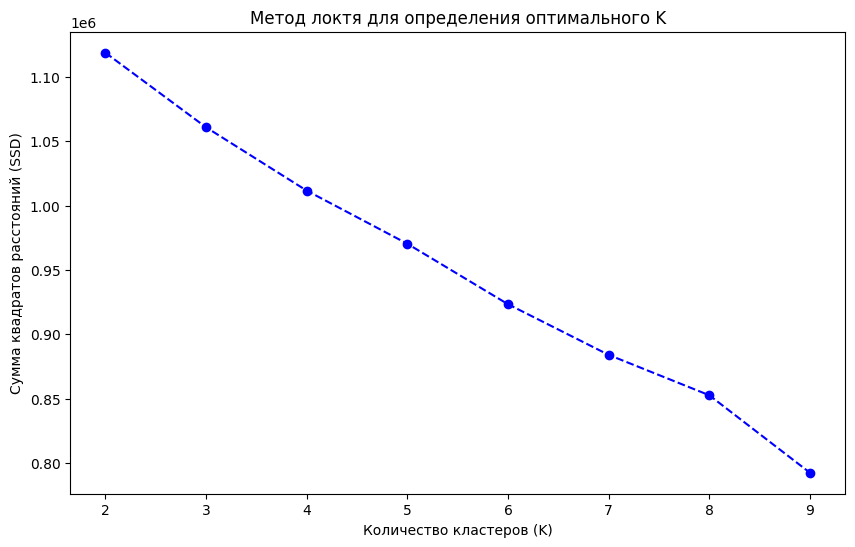

In [71]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = df.drop('ЗП', axis=1)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


ssd = []
k_values = range(2, 10)
for k in k_values:
       kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
       kmeans.fit(X_scaled)
       ssd.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, ssd, marker='o', linestyle='--', color='b')
plt.title('Метод локтя для определения оптимального K')
plt.xlabel('Количество кластеров (K)')
plt.ylabel('Сумма квадратов расстояний (SSD)')
plt.show()

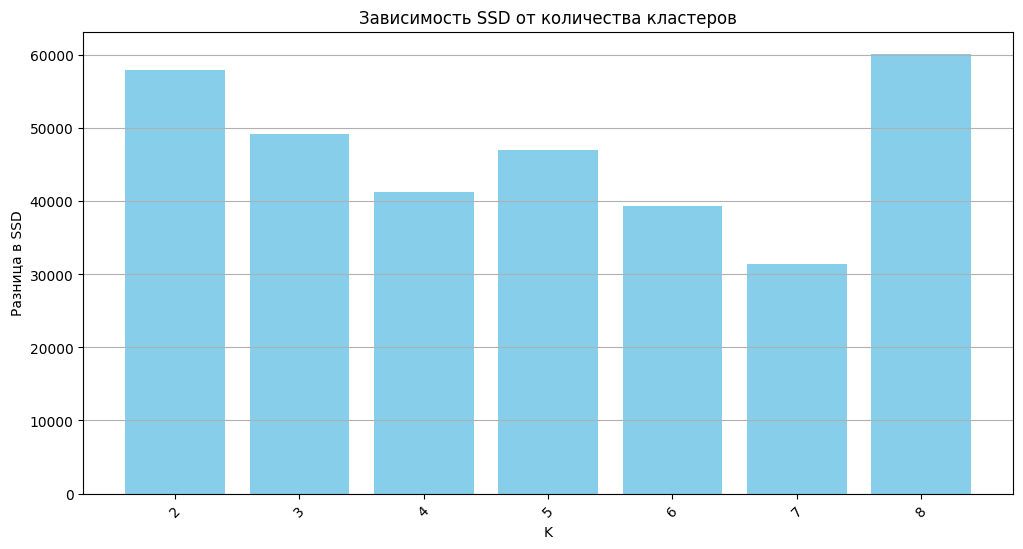

In [74]:
diff_ssd = []
for i in range(len(ssd) - 1):
  diff_ssd.append(ssd[i] - ssd[i+1])

# Barplot for SSD
plt.figure(figsize=(12, 6))
plt.bar(k_values[:len(diff_ssd)], diff_ssd, color='skyblue')
plt.title('Зависимость SSD от количества кластеров')
plt.xlabel('K')
plt.ylabel('Разница в SSD')
plt.xticks(k_values[:len(diff_ssd)], rotation=45)
plt.grid(axis='y')
plt.show()

In [77]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_scaled)
kmeans

KMeans(n_clusters=6, random_state=42)

In [78]:
kmeans.labels_

array([3, 3, 0, ..., 2, 1, 1], dtype=int32)

In [79]:
kmeans.cluster_centers_

array([[-7.30812730e-02, -8.32397895e-01, -2.26583444e-01,
        -8.47781848e-01, -1.30037548e-01, -3.99712179e-01,
        -7.48771474e-01, -4.45416299e-02, -1.47207966e-01,
        -2.51989384e-01, -1.11240589e-01, -6.13532945e-02,
        -1.04366602e-01, -2.37548872e-01, -3.41638472e-01,
         1.93751041e-01, -2.30757319e-01, -9.14014595e-01,
         6.72808678e+00, -1.27684106e-01, -2.82427280e-01,
        -1.45521561e-01, -3.85363240e-02, -1.72696715e-01,
        -6.13692191e-02, -3.45114318e-01, -6.09292673e-01,
        -3.48527116e-02],
       [ 9.71297140e-02,  2.18604992e-01,  9.90559163e-02,
        -1.71102411e-01,  2.24718425e-01, -6.50596223e-04,
         1.57351614e-01, -1.03797111e-01,  1.76916314e-01,
        -3.49770242e-01, -2.39334682e-01, -4.79292331e-01,
        -1.99887192e-01, -4.28566290e-01,  2.09115451e-01,
        -3.92604078e-01, -4.70296982e-01, -9.14014595e-01,
        -1.48630663e-01, -1.27684106e-01, -2.82427280e-01,
        -1.45521561e-01, -3.85

In [82]:
cluster_labels = pd.Series(kmeans.labels_, name="K=6 Clusters")
feature_importance = pd.concat([X, cluster_labels], axis=1).corr()['K=6 Clusters'].drop('K=6 Clusters')
print(feature_importance.sort_values(ascending=False))

Образование и ВУЗ                                   0.012717
Командировки                                        0.010885
Переезд                                             0.007634
Отрасль_Финансы и Экономика                         0.007567
Отрасль_Управление и Руководство                    0.006859
Отрасль_Образование и Наука                         0.005047
Отрасль_Технические специальности                   0.004951
Вахтовый метод                                      0.004365
Опыт работы                                         0.003128
Отрасль_Прочее                                      0.002808
Отрасль_Маркетинг и Продажи                         0.001751
Отрасль_Дизайн и UX/UI                              0.001564
Полный день                                         0.001363
Авто                                                0.001139
Пол                                                -0.000568
Полная занятость                                   -0.001006
Стажировка              

In [86]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pandas as pd

silhouette_scores = []
db_scores = []
ch_scores = []
ssd = []

# Вычисляем метрики для каждого значения K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)

    # Метрики кластеризации (moved inside the loop)
    silhouette = silhouette_score(X_scaled, kmeans.labels_)
    db = davies_bouldin_score(X_scaled, kmeans.labels_)
    ch = calinski_harabasz_score(X_scaled, kmeans.labels_)

    # Сохраняем метрики
    silhouette_scores.append(silhouette)
    db_scores.append(db)
    ch_scores.append(ch)
    ssd.append(kmeans.inertia_)

# Создаем DataFrame для удобного анализа метрик
metrics_df = pd.DataFrame({
    'K': k_values,
    'Silhouette': silhouette_scores,
    'Davies-Bouldin': db_scores,
    'Calinski-Harabasz': ch_scores,
    'SSD': ssd
})

# Нормализуем метрики для их сравнения (кроме SSD)
metrics_df['Silhouette_norm'] = (metrics_df['Silhouette'] - metrics_df['Silhouette'].min()) / (metrics_df['Silhouette'].max() - metrics_df['Silhouette'].min())
metrics_df['Davies-Bouldin_norm'] = 1 - (metrics_df['Davies-Bouldin'] - metrics_df['Davies-Bouldin'].min()) / (metrics_df['Davies-Bouldin'].max() - metrics_df['Davies-Bouldin'].min())
metrics_df['Calinski-Harabasz_norm'] = (metrics_df['Calinski-Harabasz'] - metrics_df['Calinski-Harabasz'].min()) / (metrics_df['Calinski-Harabasz'].max() - metrics_df['Calinski-Harabasz'].min())

# Композитная оценка (чем выше, тем лучше)
metrics_df['Composite_score'] = metrics_df[['Silhouette_norm', 'Davies-Bouldin_norm', 'Calinski-Harabasz_norm']].mean(axis=1)


   K  Silhouette  Davies-Bouldin  Calinski-Harabasz           SSD  \
0  2    0.186268        2.621146        5071.633320  1.118767e+06   
1  3    0.195930        2.128100        3608.307187  1.072369e+06   
2  4    0.198276        1.666892        3153.443728  1.027779e+06   
3  5    0.084220        1.873818        3038.399390  9.789191e+05   
4  6    0.095576        1.734204        2959.757186  9.352493e+05   

   Silhouette_norm  Davies-Bouldin_norm  Calinski-Harabasz_norm  \
0         0.894724             0.000000                1.000000   
1         0.979430             0.502658                0.310988   
2         1.000000             0.972859                0.096814   
3         0.000000             0.761899                0.042644   
4         0.099564             0.904234                0.005616   

   Composite_score  
0         0.631575  
1         0.597692  
2         0.689891  
3         0.268181  
4         0.336471  


In [87]:
metrics_df.head()

,K,Silhouette,Davies-Bouldin,Calinski-Harabasz,SSD,Silhouette_norm,Davies-Bouldin_norm,Calinski-Harabasz_norm,Composite_score
0,2,0.186268,2.621146,5071.633320,1.118767e+06,0.894724,0.000000,1.000000,0.631575
1,3,0.195930,2.128100,3608.307187,1.072369e+06,0.979430,0.502658,0.310988,0.597692
2,4,0.198276,1.666892,3153.443728,1.027779e+06,1.000000,0.972859,0.096814,0.689891
3,5,0.084220,1.873818,3038.399390,9.789191e+05,0.000000,0.761899,0.042644,0.268181
4,6,0.095576,1.734204,2959.757186,9.352493e+05,0.099564,0.904234,0.005616,0.336471


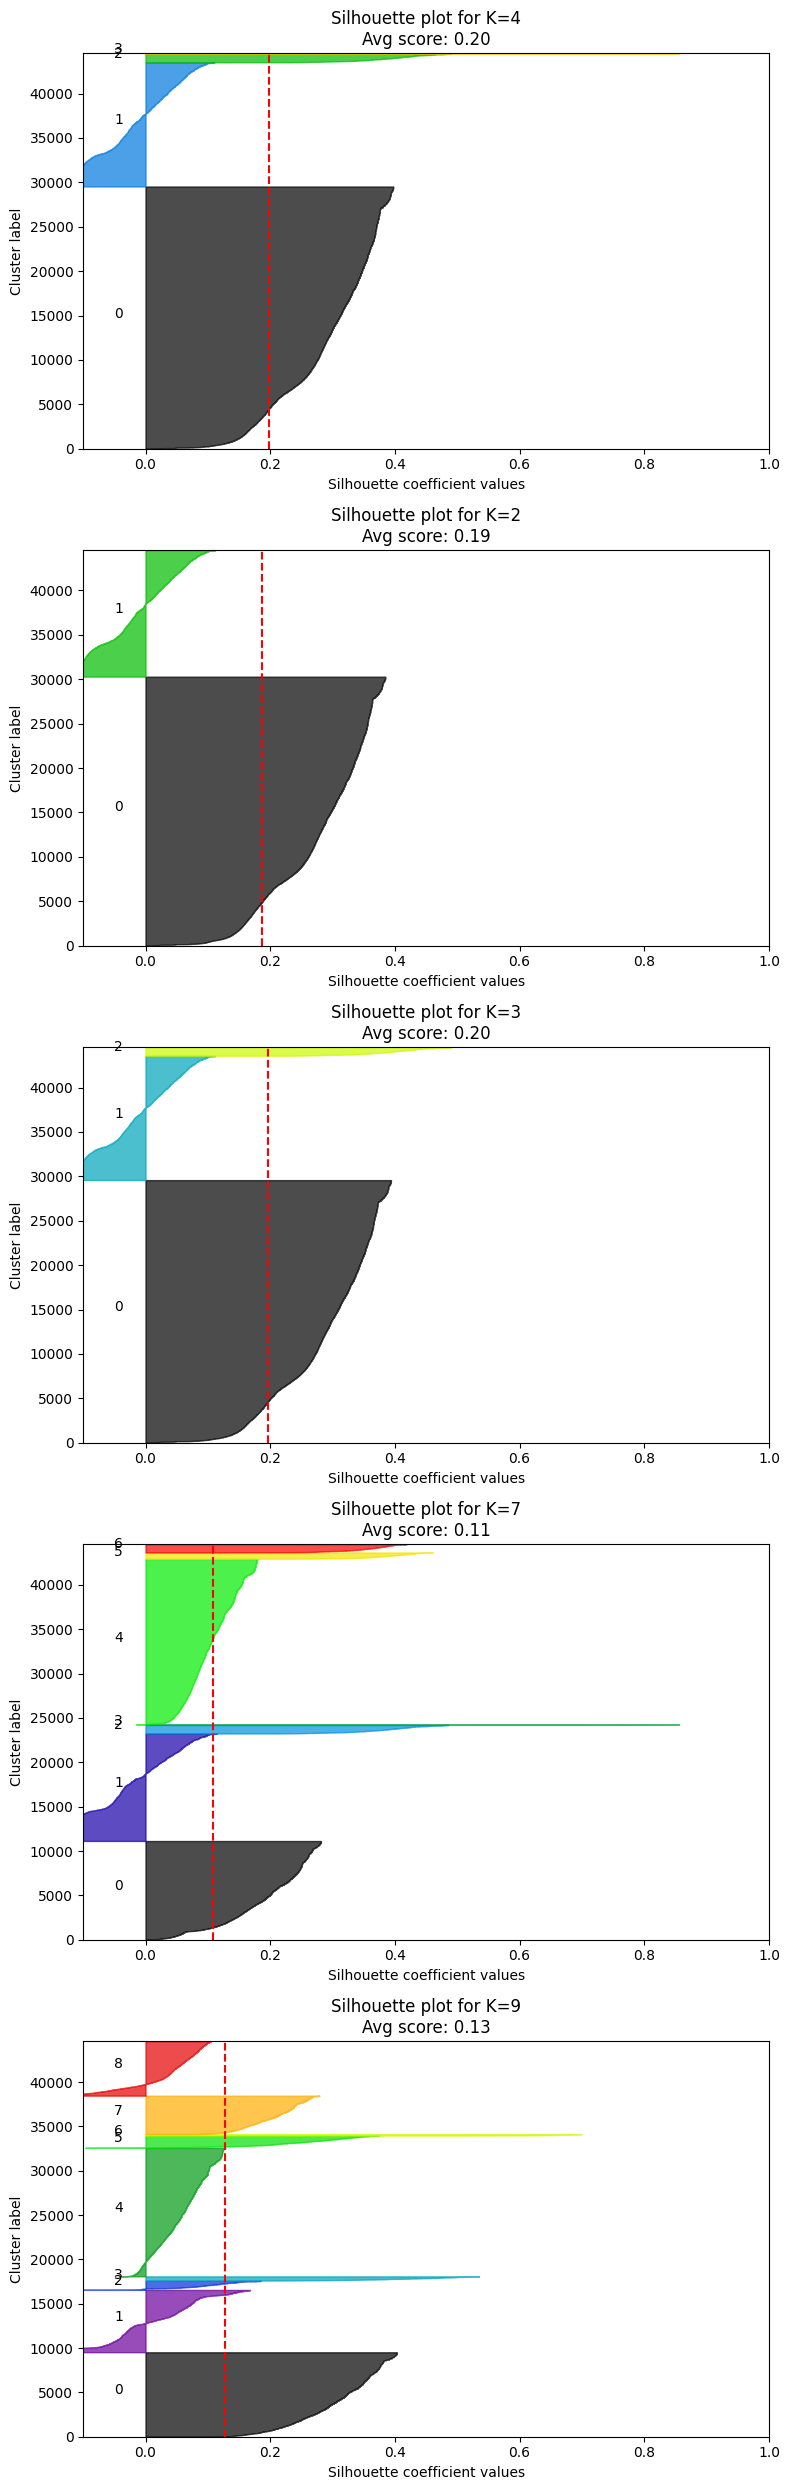

Метрики для разных K:
   K  Silhouette  Davies-Bouldin  Calinski-Harabasz           SSD  Silhouette_norm  Davies-Bouldin_norm  Calinski-Harabasz_norm  Composite_score
2  4    0.198276        1.666892        3153.443728  1.027779e+06         1.000000             0.972859                0.096814         0.689891
0  2    0.186268        2.621146        5071.633320  1.118767e+06         0.894724             0.000000                1.000000         0.631575
1  3    0.195930        2.128100        3608.307187  1.072369e+06         0.979430             0.502658                0.310988         0.597692
5  7    0.108079        1.640270        2949.252510  8.916869e+05         0.209187             1.000000                0.000669         0.403286
7  9    0.128220        1.970043        2985.261559  8.110049e+05         0.385781             0.663797                0.017624         0.355734
4  6    0.095576        1.734204        2959.757186  9.352493e+05         0.099564             0.904234     

In [89]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def plot_silhouette(X, k, ax):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    ax.set_title(f"Silhouette plot for K={k}\nAvg score: {silhouette_avg:.2f}")
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (k + 1) * 10])

    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

# Выбираем топ-5 значений K с наивысшей композитной оценкой
top_k = metrics_df.nlargest(5, 'Composite_score')['K'].values

# Строим силуэт-графики для топ-5 значений K
fig, axes = plt.subplots(5, 1, figsize=(8, 25))
for i, k in enumerate(top_k):
    plot_silhouette(X_scaled, k, axes[i])
plt.tight_layout()
plt.show()

# Выводим таблицу с метриками
print("Метрики для разных K:")
print(metrics_df.sort_values('Composite_score', ascending=False).to_string())

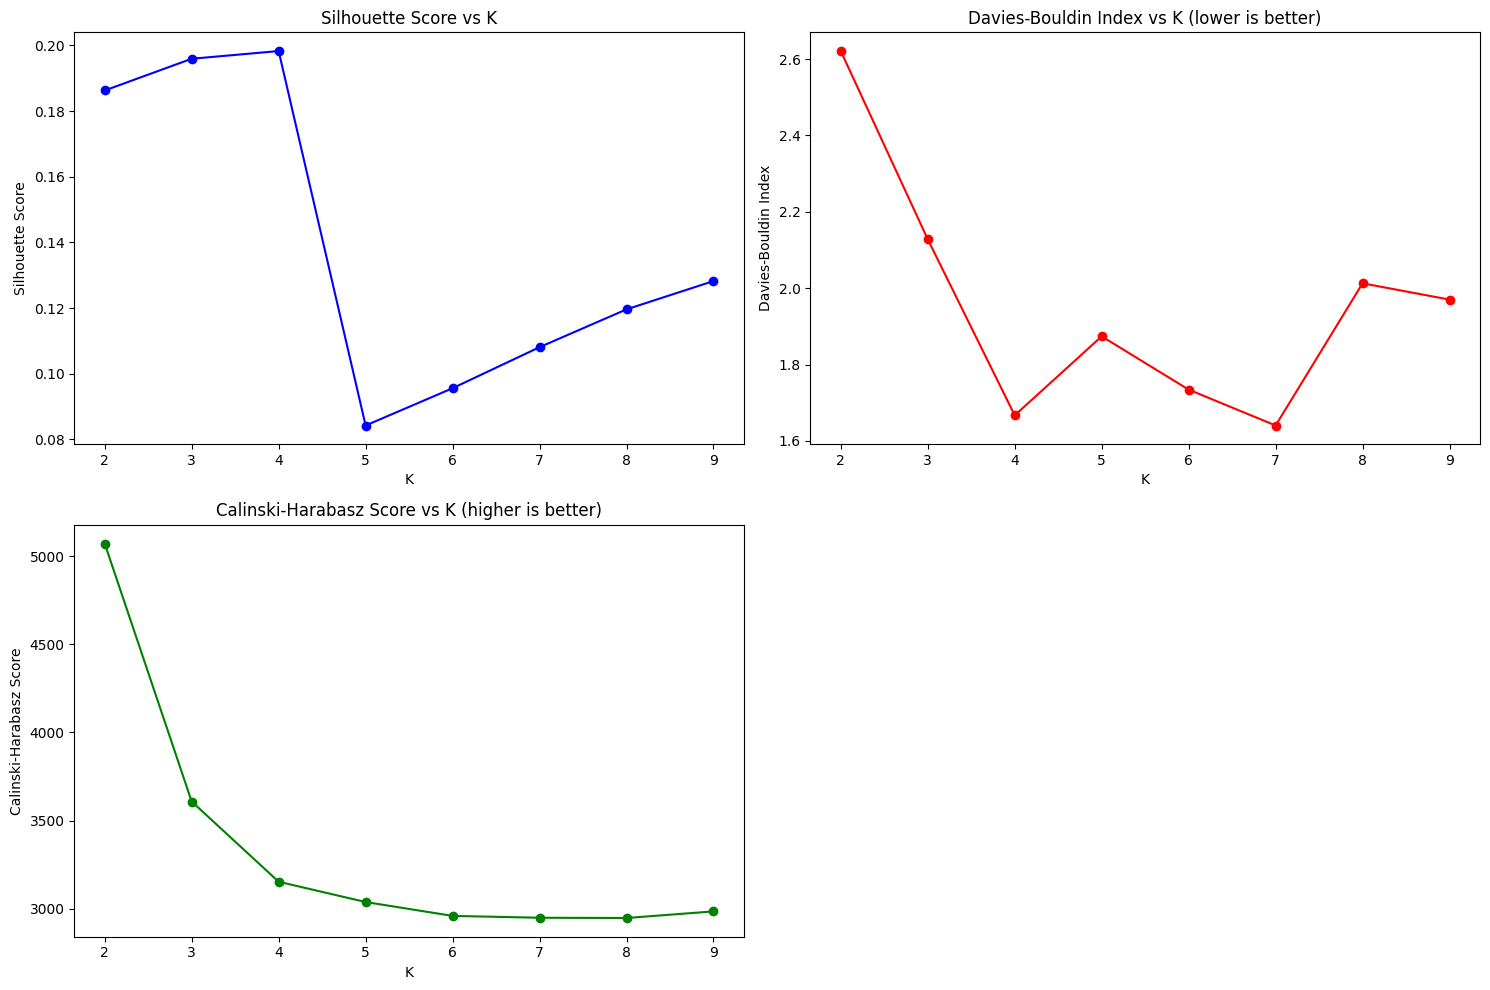

In [90]:
# Графики всех метрик
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs K')
plt.xticks(k_values)

plt.subplot(2, 2, 2)
plt.plot(k_values, db_scores, 'ro-')
plt.xlabel('K')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs K (lower is better)')
plt.xticks(k_values)

plt.subplot(2, 2, 3)
plt.plot(k_values, ch_scores, 'go-')
plt.xlabel('K')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score vs K (higher is better)')
plt.xticks(k_values)

plt.tight_layout()
plt.show()

In [92]:
# Выбираем значение K
selected_k = 9

# Создаем и обучаем модель KMeans
kmeans_final = KMeans(n_clusters=selected_k, random_state=42)
kmeans_final.fit(X_scaled)

X_clustered = df.copy()
X_clustered['Cluster'] = kmeans_final.labels_
print(X_clustered['Cluster'].unique())

[1 5 0 3 6 2 4 7 8]


In [93]:
for i in X_clustered['Cluster'].unique():
    cluster_data = X_clustered[X_clustered['Cluster'] == i]
    print(f"Cluster {i}:")
    print(f"  - Mean ЗП: {cluster_data['ЗП'].mean()}")

Cluster 1:
  - Mean ЗП: 82649.573523736
Cluster 5:
  - Mean ЗП: 86969.80774496382
Cluster 0:
  - Mean ЗП: 39431.45911949685
Cluster 3:
  - Mean ЗП: 101330.8699369456
Cluster 6:
  - Mean ЗП: 80538.67721296492
Cluster 2:
  - Mean ЗП: 55926.948832588176
Cluster 4:
  - Mean ЗП: 69785.67804269907
Cluster 7:
  - Mean ЗП: 47992.126394052044
Cluster 8:
  - Mean ЗП: 83713.6563146998


In [94]:
# Выбираем значение K
selected_k = 9

# Создаем и обучаем модель KMeans
kmeans_final = KMeans(n_clusters=selected_k, random_state=42)
kmeans_final.fit(X_scaled)

X_clustered = df.copy()
X_clustered['Cluster'] = kmeans_final.labels_
X_clustered

,ЗП,Опыт работы,Образование и ВУЗ,Авто,Пол,Возраст,Переезд,Командировки,Волонтерство,Полная занятость,...,Отрасль_Дизайн и UX/UI,Отрасль_Другие,Отрасль_Маркетинг и Продажи,Отрасль_Образование и Наука,Отрасль_Прочее,Отрасль_Творчество и Медиа,Отрасль_Технические специальности,Отрасль_Управление и Руководство,Отрасль_Финансы и Экономика,Cluster
0,29000,2,2,1,1,39,0,0,0,1,...,False,False,False,False,False,False,False,False,False,1
1,40000,2,3,0,1,60,0,1,0,1,...,False,False,False,False,True,False,False,False,False,5
2,20000,2,1,0,0,36,0,0,0,1,...,False,False,False,False,False,False,False,False,False,0
3,100000,2,3,0,1,38,0,1,0,1,...,False,False,False,False,False,False,False,False,False,5
4,140000,2,3,0,0,26,0,1,0,1,...,False,False,False,False,False,False,False,True,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,50000,2,3,0,1,30,1,1,0,1,...,False,False,False,False,False,False,False,False,False,6
44740,39000,2,3,0,1,27,1,1,0,1,...,False,False,False,False,False,False,False,False,False,5
44741,40000,2,3,0,0,48,1,1,0,1,...,False,False,False,False,False,False,False,False,False,6
44742,20000,2,3,1,1,24,0,0,0,1,...,False,False,False,False,False,False,False,True,False,3


In [ ]:
# Выбираем значение K
selected_k = 5

# Создаем и обучаем модель KMeans
kmeans_final = KMeans(n_clusters=selected_k, random_state=42)
kmeans_final.fit(X_scaled)

X_clustered = df.copy()
X_clustered['Cluster'] = kmeans_final.labels_
X_clustered